## Introduction:
This notebook was created as a format for presenting my findings on a project I did in school.  I went through twenty years of data from the IPEDS website to find information about schools, how much their tuition cost for undergrads, and how much money they received from government pell grants and loans.  This information came from three separate tables for each year, and covered twenty years from 2000-2020.  This totaled to about 60 different tables that I wrote a script to go through and output files in the .pkl format that only contained the useful/relevant data.  This code can be found in the 'data_parsing_and_cleaning.ipynb' notebook.
the 'data_analysis.ipynb' notebook took the cleaned data and did the necessary math and comparison to get it all in the format I needed for presentation.  This mainly consisted of renaming columns and finding totals for each year.
Sadly I saved all of the data and pickles to a VM that the school let me use for that semester and I lost access to that VM and all of the pickles contained therein. Since the code is all here you can see what I did, and if you would like to see the results in a concise format, I have a video of myself presenting my findings here: https://youtu.be/5cD4dOjy4kM
I have included a few csv files that contain samples of the original data I was sorting through.  They can be found in the same directory as this file.


# Costs of Undergraduate Tuition and Federal Contributions, 2000-2020

Please run lines of code at bottom of page to make everything work!

## Background

I chose to analyze this data because the cost of tuition is, of course, relevant to me.  the cost of tuition has done nothing but go up for a long time and I was curious as to the reason why. One theory that has been put forward is that a big reason for the continued increase in tuition was federal contributions (such as Pell Grants and Student Loans).  The idea is that the universities know that even though their tuition is unaffordable by any normal standard, the government will step in and subsidize the cost, making it affordable.  Theoretically, what we will see is a kind of positive feedback loop, with subsidies continually growing and tuition costs continually increasing.  I will analyze this and other interesting information found in the historical IPEDS data I used.

## Difficulties in Taming Data

I ran into quite a few difficulties while taming the data.  I can see now why this class was titled 'data wrangling'

### Sheer Size

There was so much data to go through.  I started by looking on the IPEDS website for the 2020 information and that was when I realized I was in over my head.  each year had upwards of 45 data tables to go through, some of which had hundreds of variables to look at.  The definitions and explanations for each variable were housed in a separate table. 

In [ ]:
sizedf = pd.read_pickle(pklpath+'2020merge.pkl')

In [ ]:
sizedf.head()

,UNITID,INSTNM,STABBR,CONTROL,YEAR,FTIS,FTOS,PTIS (9CH),PTOS (9CH),SCUGRAD,UPGRNTN,UPGRNTT,UPGRNTA,UFLOANN,UFLOANT,UFLOANA
0,100654,ALABAMA A & M UNIVERSITY,AL,Public,2020,11624.0,20234.0,5597.0,8180.0,5273.0,3741.0,19916507.0,5323.845763,3957.0,28131849.0,7109.388173
1,100663,UNIVERSITY OF ALABAMA AT BIRMINGHAM,AL,Public,2020,9768.0,21600.0,4413.0,8850.0,13836.0,4700.0,26747816.0,5691.024681,6487.0,45658008.0,7038.385694
2,100690,AMRIDGE UNIVERSITY,AL,"Private, NFP",2020,12950.0,12950.0,7820.0,7820.0,365.0,272.0,972719.0,3576.172794,310.0,2518027.0,8122.667742
3,100706,UNIVERSITY OF ALABAMA IN HUNTSVILLE,AL,Public,2020,13458.0,25854.0,7571.0,12530.0,7987.0,1919.0,8533685.0,4446.943721,3079.0,20051487.0,6512.337447
4,100724,ALABAMA STATE UNIVERSITY,AL,Public,2020,12668.0,20996.0,7463.0,10586.0,3750.0,2763.0,13341998.0,4828.808541,2927.0,27329106.0,9336.899898


In [ ]:
sizedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3606 entries, 0 to 3605
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   UNITID      3606 non-null   int64  
 1   INSTNM      3606 non-null   object 
 2   STABBR      3606 non-null   object 
 3   CONTROL     3606 non-null   object 
 4   YEAR        3606 non-null   int64  
 5   FTIS        3591 non-null   float64
 6   FTOS        3591 non-null   float64
 7   PTIS (9CH)  3558 non-null   float64
 8   PTOS (9CH)  3558 non-null   float64
 9   SCUGRAD     3604 non-null   float64
 10  UPGRNTN     3551 non-null   float64
 11  UPGRNTT     3551 non-null   float64
 12  UPGRNTA     3551 non-null   float64
 13  UFLOANN     3236 non-null   float64
 14  UFLOANT     3236 non-null   float64
 15  UFLOANA     3236 non-null   float64
dtypes: float64(11), int64(2), object(3)
memory usage: 478.9+ KB


In [ ]:
3606*21

72120

### Dirty, Nebulous Data

Each year, IPEDS does a survey of all the universities in the united states and gathers that data in one place.  They separate out information based on relevancy and topic.  Each table will have information about things like admissions, university information, financial aid, graduation rates, and fall staff.  I spent a long time going through these tables and finding which ones were going to be most useful for my purposes.  It also turned out that each variable had a friend to go with it that was used to identify imputation(the status of response/how the information in that variable was derived).  Digging into the data I found that some variables were duplicated (multiple reports of cohort size or cost) and figuring out which data to use was a major challenge.  There were also many holes in the data, represented by a variety of things(sometimes periods, sometimes zeros, sometimes blanks.

### Inconsistency

Finally, there were huge amounts of variable name inconsistency over time, making it difficult to parse through information by column name.  This also made it difficult to remember what each variable meant, and how it was supposed to be used.  Steps were taken to get all the information in the correct format and usable over time.

## Overcoming the Hurdles

This project and its scope changed a few times through the course of me gathering the data.  Solutions were made and workarounds had to be created to get the result I was going for.

### Overcoming Size

In order to cut down on the size of the data, I picked three tables to pull my information from.  I will refer to them as HD, IC, and SFA.  HD contained information about universities such as name, location, and size.  IC housed all the information about costs, broken down in different categories.  SFA was the home for data about student financial aid.  Picking out the columns I wanted was a simple, time-consuming matter of going through the definitions of the variables and choosing out the ones I liked the most.  In each of the three cases, I then created a list containing the names of the columns and saved only those columns into a DataFrame:

In [ ]:
def iccleaner(year):    
    import pandas as pd
    ic = pd.read_csv('/home/u1033387/FinalProject/histdata/ic{}_ay.csv'.format(year),encoding='utf-8', index_col=False)
    for x in range(len(ic.columns.values)):
        ic.columns.values[x] = ic.columns.values[x].upper()
    keep_list = ['UNITID','TUITION2','FEE2','HRCHG2','TUITION3','FEE3','HRCHG3','CHG4AY2']
    ic = ic[keep_list].copy()

The key to this process working in the larger scope of things was ensuring that it was iterable over the years of data. this is why year was put into the name of the file that was being called as a variable.  it was also key to use the index_col=False argument because later on as I started going through each of the years I realized that some of them were using the UNITID (my unique identifier) as the index.  I also realized that some years the column headers were lowercase, and some were uppercase.  It became necessary to convert all of the column titles to uppercase for consitency.

After that I took all the information and aggregated it so that it looked less like it did above, and more like this:

In [ ]:
avgdf = pd.read_pickle(pklpath+'allavg.pkl')

In [ ]:
avgdf.head(21).round()

,YEAR,# UGRAD STUDENTS,# PGRANT RECIPIENTS,TOTAL PGRANT $,AVG. PGRANT $/RECIPIENT,# LOAN RECIPIENTS,TOTAL LOAN $,AVG. LOAN $/RECIPIENT,FULL-TIME IN STATE COST,FULL-TIME OUT OF STATE COST,PART-TIME IN STATE COST (9CH),PART-TIME OUT OF STATE COST (9CH)
0,2000.0,3352.0,169.0,388615.0,2313.0,226.0,810708.0,3297.0,7814.0,9503.0,3015.0,3578.0
1,2001.0,3456.0,159.0,397091.0,2479.0,208.0,816227.0,3591.0,8276.0,9952.0,3127.0,3690.0
2,2002.0,3397.0,181.0,497752.0,2743.0,236.0,905277.0,3589.0,8824.0,10559.0,3451.0,4133.0
3,2003.0,3448.0,185.0,547152.0,2933.0,240.0,999510.0,3891.0,9361.0,11162.0,3833.0,4516.0
4,2004.0,3577.0,194.0,570780.0,2968.0,256.0,1041139.0,3902.0,10004.0,11798.0,3641.0,4256.0
5,2005.0,3657.0,201.0,594839.0,2982.0,270.0,1182954.0,4121.0,10676.0,12531.0,3914.0,4559.0
6,2006.0,3736.0,194.0,576531.0,2979.0,273.0,1290596.0,4436.0,11243.0,13165.0,4117.0,4786.0
7,2007.0,3795.0,193.0,607465.0,3139.0,275.0,1354816.0,4663.0,11868.0,13881.0,4390.0,5094.0
8,2008.0,3785.0,209.0,627065.0,2877.0,289.0,1357628.0,4610.0,12473.0,14530.0,4605.0,5312.0
9,2009.0,3958.0,1112.0,3567112.0,3184.0,1563.0,10777282.0,6660.0,13145.0,15252.0,4768.0,5564.0


### Overcoming Dirt

This was an interesting process because for the sake of data manipulation in my case, it seemed that the best way to handle blanks in the data was to ensure that they were in the NaN format(so that zeros and other oddities would not skew or break my data when aggregating).  This presented issues, however, because I needed to make sure I made this change at the right time, otherwise errors showed up everywhere when comparing and modifying different columns.  The below function is a great example of when this was an issue.  I had information broken down between in state tution, out of state tution, total fees, and the cost of books and other miscellaneous items, with which I had to do some math to get my desired results:

In [ ]:
def colcompile (file):
    new_ic = pd.DataFrame()
    new_ic['UNITID'] = file['UNITID']
    new_ic['FTIS'] = file['ISUGT']+ file['ISUGF']+ file['BS']
    new_ic['FTOS'] = file['OSUGT']+file['OSUGF']+file['BS']
    new_ic['PTIS (9CH)'] = (file['ISUGPHC']*9)+file['ISUGF']+file['BS']
    new_ic['PTOS (9CH)'] = (file['OSUGPHC']*9)+file['OSUGF']+file['BS']
    return new_ic

Here we can see that the FTIS (Full Time In State) variable is derived from a combination of the ISUGT, ISUGF, and BS (In State UnderGrad Tuition, In State UnderGrad Fees, and Books/Services, respectively) variables.  part time was also defined as PHC (Per Hour Charge), but I could not find information on how many credits part time students took on average, so I guessed that nine seemed to make sense and multiplied the per hour charge by nine for in state and out of state students.  None of this would have been possible if the zeros in each case had been in NaN format.

### Overcoming Inconsistency

The financial aid data proved to be incredibly challenging and very inconsitent over time. My solution was manually analyzing inconsitencies and creating new functions to process each into a consistent, recognizable format, like so:

In [ ]:
def conv2008 (file):
    keep_list = ['UNITID','SCUGRAD', 'PGRNT_N', 'PGRNT_A', 'FLOAN_N', 'FLOAN_A']
    sfa_dict_08 = {'PGRNT_N':'UPGRNTN', 'PGRNT_A':'UPGRNTA', 'FLOAN_N':'UFLOANN', 'FLOAN_A':'UFLOANA'}
    file = file[keep_list].copy()
    for column in sfa_dict_08:
        for x in range(len(sfa_dict_08)+2):
            if column == file.columns.values[x]:
                file.columns.values[x] = sfa_dict_08[column]

    file = file.replace(0, np.nan)
    file.insert(3, 'UPGRNTT', file['UPGRNTA']*file['UPGRNTN'])
    file.insert(6, 'UFLOANT', file['UFLOANA']*file['UFLOANN'])
    return file

def conv2007 (file):
    keep_list = ['UNITID','SCFY2','SCFA2','FGRNT_N','FGRNT_A','LOAN_N','LOAN_A']
    sfa_dict_07 = {'FGRNT_N':'UPGRNTN','FGRNT_A':'UPGRNTA','LOAN_N':'UFLOANN','LOAN_A':'UFLOANA'}
    file = file[keep_list].copy()
    for column in sfa_dict_07:
        for x in range(len(sfa_dict_07)+(len(keep_list)-len(sfa_dict_07))):
            if column == file.columns.values[x]:
                file.columns.values[x] = sfa_dict_07[column]
    file = file.replace(0, np.nan)
    file.insert(3, 'UPGRNTT', file['UPGRNTA']*file['UPGRNTN'])
    file.insert(6, 'UFLOANT', file['UFLOANA']*file['UFLOANN'])
    file.insert(1, 'SCUGRAD', file['SCFA2'].fillna(file['SCFA2']))
    file.drop(['SCFY2', 'SCFA2'], axis=1, inplace=True)
    return file

## Results and Major Findings (Finally, the good stuff)

In [ ]:
df = pd.read_pickle(pklpath+'')

### Most and Least Expensive (2020)

In [ ]:
costmerge.drop('YEAR', axis =1).sort_values('FTIS', ascending=False).head(10).round(2)

,UNITID,INSTNM,STABBR,CONTROL,FTIS,FTOS,PTIS (9CH),PTOS (9CH),SCUGRAD,UPGRNTN,UPGRNTT,UPGRNTA,UFLOANN,UFLOANT,UFLOANA
1111,166869,MGH INSTITUTE OF HEALTH PROFESSIONS,MA,"Private, NFP",78241.0,78241.0,5041.0,5041.0,179.0,NaN,NaN,NaN,139.0,1817700.0,13076.98
2175,212577,FRANKLIN AND MARSHALL COLLEGE,PA,"Private, NFP",62262.0,62262.0,18508.0,18508.0,2315.0,434.0,2149549.0,4952.88,1012.0,5457295.0,5392.58
2295,217156,BROWN UNIVERSITY,RI,"Private, NFP",62216.0,62216.0,19621.0,19621.0,7160.0,940.0,4611211.0,4905.54,850.0,4940030.0,5811.80
369,126678,COLORADO COLLEGE,CO,"Private, NFP",62104.0,62104.0,24538.0,24538.0,2098.0,238.0,1142173.0,4799.05,463.0,2566741.0,5543.72
1774,197133,VASSAR COLLEGE,NY,"Private, NFP",61910.0,61910.0,18458.0,18458.0,2439.0,553.0,2693457.0,4870.63,1013.0,5005042.0,4940.81
1056,164465,AMHERST COLLEGE,MA,"Private, NFP",61890.0,61890.0,2000.0,2000.0,1839.0,437.0,2127649.0,4868.76,270.0,1437200.0,5322.96
1138,168148,TUFTS UNIVERSITY,MA,"Private, NFP",61862.0,61862.0,20167.0,20167.0,5907.0,672.0,3392454.0,5048.29,1232.0,5916429.0,4802.30
1594,190150,COLUMBIA UNIVERSITY IN THE CITY OF NEW YORK,NY,"Private, NFP",61826.0,61826.0,21026.0,21026.0,8221.0,1868.0,9574516.0,5125.54,1530.0,15315036.0,10009.83
2908,247649,LANDMARK COLLEGE,VT,"Private, NFP",61780.0,61780.0,19581.0,19581.0,502.0,96.0,425513.0,4432.43,144.0,899742.0,6248.21
2127,209922,REED COLLEGE,OR,"Private, NFP",61670.0,61670.0,24472.0,24472.0,1457.0,175.0,830608.0,4746.33,553.0,3318937.0,6001.69


In [ ]:
costmerge.drop('YEAR', axis =1).sort_values('FTIS', ascending=True).head(10).round(2)

,UNITID,INSTNM,STABBR,CONTROL,FTIS,FTOS,PTIS (9CH),PTOS (9CH),SCUGRAD,UPGRNTN,UPGRNTT,UPGRNTA,UFLOANN,UFLOANT,UFLOANA
3511,488846,UNIVERSITY OF THE PEOPLE,CA,"Private, NFP",1200.0,1200.0,1200.0,1200.0,4424.0,NaN,NaN,NaN,NaN,NaN,NaN
1557,188216,SOUTHWESTERN INDIAN POLYTECHNIC INSTITUTE,NM,Public,1920.0,1920.0,1920.0,1920.0,443.0,241.0,926923.0,3846.15,NaN,NaN,NaN
3157,442781,TOHONO O'ODHAM COMMUNITY COLLEGE,AZ,Public,1932.0,1932.0,1416.0,1416.0,431.0,136.0,579246.0,4259.16,NaN,NaN,NaN
871,155140,HASKELL INDIAN NATIONS UNIVERSITY,KS,Public,2080.0,2080.0,2080.0,2080.0,789.0,494.0,2439175.0,4937.60,NaN,NaN,NaN
2644,232885,SENTARA COLLEGE OF HEALTH SCIENCES,VA,"Private, NFP",2344.0,2344.0,5312.0,5312.0,318.0,106.0,441290.0,4163.11,190.0,1595619.0,8397.99
2376,219338,AVERA SACRED HEART HOSPITAL,SD,"Private, NFP",2500.0,2500.0,500.0,500.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN
2394,219842,PENTECOSTAL THEOLOGICAL SEMINARY,TN,"Private, NFP",2596.0,2596.0,1096.0,1096.0,109.0,NaN,NaN,NaN,NaN,NaN,NaN
2368,219170,AVERA MCKENNAN HOSPITAL SCHOOL OF RADIOLOGIC T...,SD,"Private, NFP",2600.0,2600.0,NaN,NaN,24.0,NaN,NaN,NaN,3.0,17814.0,5938.00
2930,363633,LUNA COMMUNITY COLLEGE,NM,Public,2620.0,3820.0,1795.0,2245.0,1043.0,255.0,1150809.0,4512.98,34.0,121899.0,3585.26
1922,200527,TURTLE MOUNTAIN COMMUNITY COLLEGE,ND,"Private, NFP",2650.0,2650.0,1621.0,1621.0,531.0,345.0,1710092.0,4956.79,NaN,NaN,NaN


### Which State is Most Expensive? (2020)

In [ ]:
expstate = costmerge.sort_values('STABBR')
expstate = expstate.drop('YEAR', axis=1)
expstate = expstate.groupby('STABBR').mean()

expstate = expstate.reset_index()
expstate = expstate.sort_values('FTIS', ascending = False).round(2)
expstate = expstate.reset_index()

expstate = expstate.drop('index',axis=1)

In [ ]:
expstate.style.apply(custom_style, axis=1)

,STABBR,UNITID,FTIS,FTOS,PTIS (9CH),PTOS (9CH),SCUGRAD,UPGRNTN,UPGRNTT,UPGRNTA,UFLOANN,UFLOANT,UFLOANA
0,VT,232087.070000,33926.140000,39360.430000,16268.070000,18305.930000,2394.000000,577.640000,2448767.570000,4294.740000,1060.500000,7173507.290000,6808.470000
1,RI,257335.380000,33413.380000,36500.080000,9781.770000,10917.150000,5352.690000,1549.150000,6696847.080000,4609.570000,2245.000000,14888161.150000,6818.300000
2,MA,183862.620000,32202.410000,34604.920000,11217.970000,12017.820000,3494.490000,993.880000,4292053.820000,4376.690000,1520.180000,9819898.340000,6487.970000
3,DC,203547.310000,28230.690000,28757.770000,9831.920000,10029.920000,4086.850000,1119.460000,5207344.460000,4516.930000,1676.150000,11876941.850000,6649.400000
4,PA,243179.300000,26590.350000,27879.770000,8412.040000,8926.080000,3023.470000,902.680000,3992860.670000,4502.020000,1566.600000,10292351.610000,6857.820000
5,IN,221464.230000,23658.510000,27047.110000,8272.020000,9313.800000,5770.980000,1777.640000,7205433.340000,4315.720000,2149.120000,11816162.200000,6561.090000
6,CT,160341.150000,23237.120000,29993.050000,7834.950000,10174.050000,3876.370000,1417.440000,5934458.070000,4320.570000,1537.020000,11411727.700000,6490.360000
7,IA,163520.440000,21835.360000,23082.620000,7985.690000,8418.840000,3450.530000,876.420000,3821849.950000,4362.280000,1377.640000,8658944.780000,6429.930000
8,NH,183062.410000,21693.410000,26818.230000,10316.360000,12041.090000,6297.680000,2501.950000,8059722.410000,4240.790000,3926.230000,27589458.550000,6549.480000
9,IL,174922.530000,21180.990000,22579.020000,7971.550000,8385.570000,4169.870000,1343.790000,5973154.440000,4406.680000,1336.340000,8921105.140000,6200.940000


### What is it like in Utah?

In [ ]:
utdf = costmerge[costmerge['STABBR']=='UT'].sort_values('FTIS')

In [ ]:
utcost = utdf[['INSTNM','FTIS']]

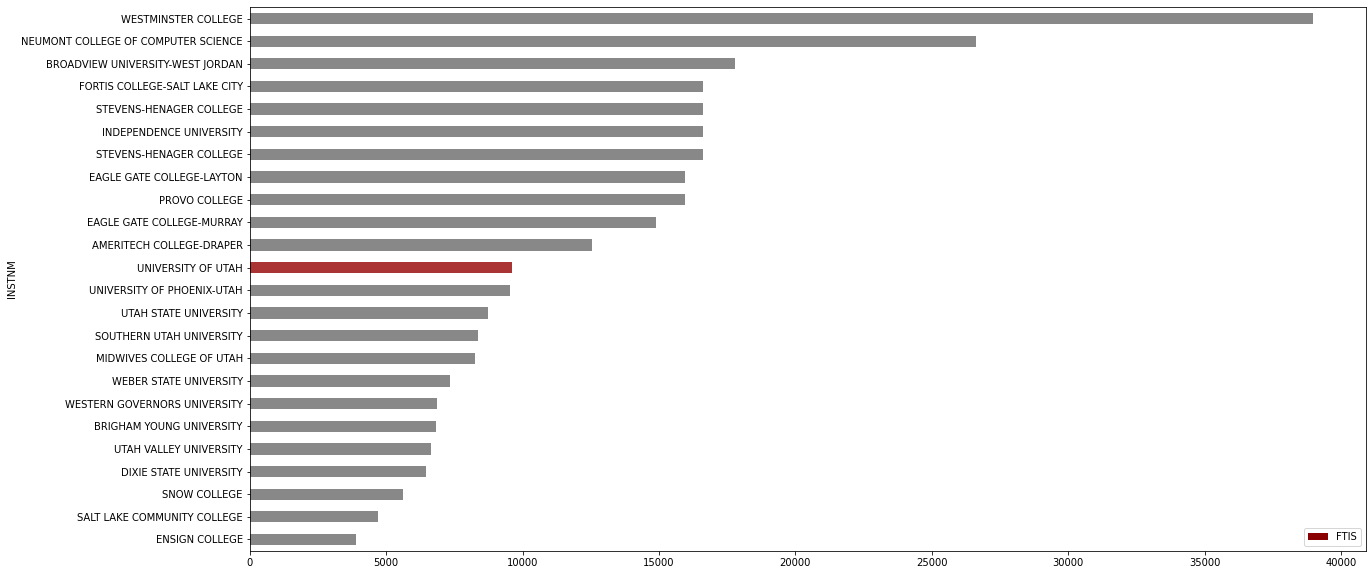

In [ ]:
ax = utcost.plot(x='INSTNM', kind='barh', figsize=(20,10), color='darkred')
for bar in ax.patches:
    bar.set_facecolor('#888888')
highlight = 2590
pos = utcost.index.get_loc(highlight)
ax.patches[pos].set_facecolor('#aa3333')

In [ ]:
display(selector)
display(output)
selector.observe(multiplot, names='value')

NameError: ignored

## Next Steps

I think I did a good job of covering all my bases, although there is always more that can be done.  I wanted to get a heatmap of the United States and show visually which states were more expensive and which ones were cheaper, but I could not get the geoplot library to import into jupyter for the life of me.  I am unsure of what the issue was, but I tried everything from installing anaconda and using the conda forge to manually installing the package.  The strange thing is that when I went looking for the package in my directories, I was able to find it, but jupyter just kept saying ('no module named geoplot') so I gave up.  Other things that would be interesting to look at might be adjusting for inflation.  I chose not to do that because I figured since I was just doing a comparison of then prices with then prices and now prices with now prices, it would at least give a good idea of what was going on, although not perfect.  It also would have been nice to look at the affects of student loans (what percentage of students use them, how long on average it would take to pay off, how much interest would accrue over that time, and how much collective debt is accumulated.  Sadly I do not have the data for a lot of those questions and am unsure of how I could get it.

Overall this has been an incredible experience that I have really enjoyed.  I have loved getting to use and learn more about python and the great things it can do.  I am a big excel nerd and rely heavily on the functionality that it has, but I have had my eyes open to how nice it can be to have an open-ended tool like python with a lot more flexibility.  I am excited to see what kinds of things I can automate in my job and even day-to-day life.

##### Bad-looking code used for presentation:

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import ipynb
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from ipynb.fs.full.sfacleaner import yearconv
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pklpath = r'/home/u1033387/FinalProject/pickles/'
hdm = pd.read_pickle(pklpath+'hdmaster.pkl')

sfa2020 = pd.read_pickle(pklpath+'sfa1920.pkl')
ic2020 = pd.read_pickle(pklpath+'ic2020_ay.pkl')
costmerge=pd.merge(hdm,ic2020,on='UNITID', how='right')
costmerge=pd.merge(costmerge, sfa2020, on=['UNITID', 'YEAR'])

from IPython.display import display, Markdown, clear_output
# widget packages
import ipywidgets as widgets
df = pd.read_pickle(pklpath+'allavg.pkl')
opts = df.columns.values

selector = widgets.SelectMultiple(
options=opts,
value=[opts[1]],
rows=len(opts),
description='Variables',
disabled=False)

output = widgets.Output()



def multiplot(widg):
    choices = widg['new']
    data = df.loc[:, choices] if choices else df
    output.clear_output(wait=True)
    with output:
        ax = data.plot(x='YEAR',figsize=(20,6),xticks=[x for x in range(2000, 2021)] )
        plt.show()
        
        
        
def custom_style(row):

    color = 'black'
    if row.values[0] == 'UT':
        color = 'darkred'
        text_color = 'white'

    return ['color: %s' % color]*len(row.values)



ModuleNotFoundError: ignored